1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


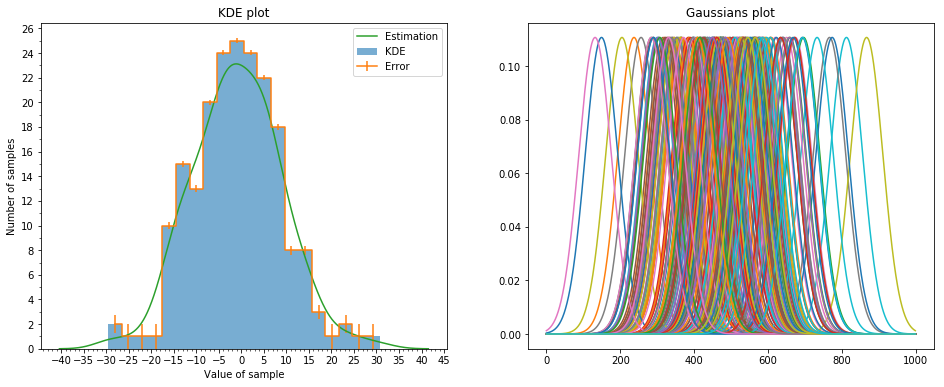

In [108]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline


mean=0
std=10
samp=200
vnd=np.random.normal(mean, std, samp)

# use a meaningful number of bins
bins_num = int(samp/std)


fig = plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('KDE plot')
N, edges, boh = ax1.hist(vnd, bins=bins_num, label='KDE', alpha=0.6)
prova = np.linspace((edges[0]+edges[1])/2, (edges[-2]+edges[-1])/2, len(edges)-1)
ax1.set_xlabel("Value of sample")

# set a proper y axis label
ax1.set_ylabel("Number of samples")

# set proper value of y axis major ticks labels
ax1.yaxis.set_major_locator(MultipleLocator(2.000))

ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(5.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

# display the histograms as data points with errors 
ax1.errorbar(prova, N, label='Error', drawstyle = 'steps-mid', yerr = 1/(N**0.5))

# for every element of x, create a gaussian
# plot all the gaussian functions so obtained
std2 = 1.06*vnd.std()*(samp**(-1/5))
spc = np.linspace(vnd.min()-3*std2, vnd.max()+3*std2, 1000) 
ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Gaussians plot')
pdf = []
for x in vnd:
    pdf.append(norm(x, std2).pdf(spc))
    ax2.plot(pdf[-1])

# Sum all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram   
est = np.sum(pdf, axis=0)/samp
ax1.plot(spc, est*sp.integrate.trapz(N, x = edges[1:]), label='Estimation')

ax1.legend()
plt.show()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-01-29 17:03:46--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2019-01-29 17:03:46--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c133c6a5ca666c203a796ed98.dl.dropboxusercontent.com/cd/0/inline/AaWaymfGhMOWAchiu50ppuzO0ceb8XR0Zsyivc_3gjHg1dKE1z0-9hRxOxzC7dPRYSMQn-y88yD935zMPe6syHELfILt_D3hwlXRs39Xm7zc8TZlWuizr64_i6uEmz7wj3s/file# [following]
--2019-01-29 17:03:47--  https://uc9c133c6a5ca666c203a796ed98.dl.dropboxusercontent.com/cd/0/inline/AaWaymfGhMOWAchiu50ppuzO0ceb8XR

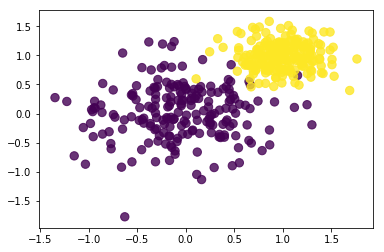

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png --no-check-certificate
from IPython.display import Image
Image('two_categories_scatter_plot.png')


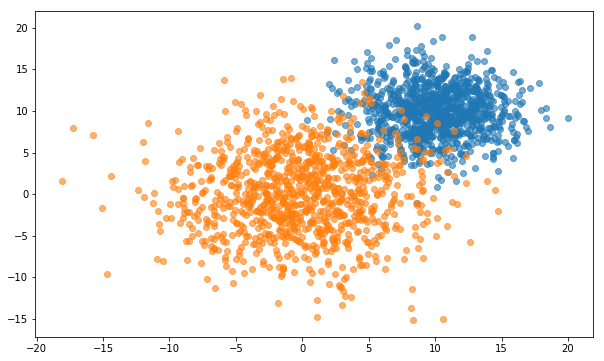

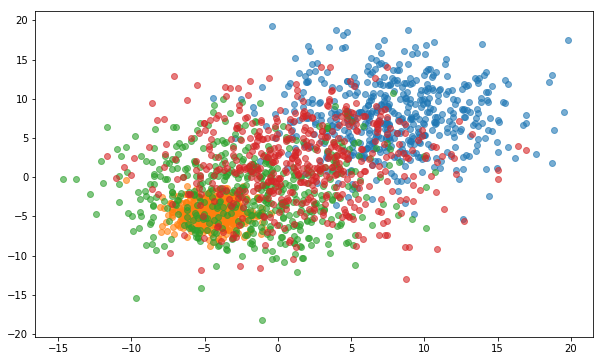

In [156]:
mean1 = 10
mean2 = 0
std1 = 3
std2 = 5
sample = 1000

c1 = np.random.normal(mean1, std1, size=(1, sample, 2))
c2 = np.random.normal(mean2, std2, size=(1, sample, 2))

plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax.scatter(x=c1[0, :, 0], y=c1[0, :, 1], marker='o', alpha=0.6)
ax.scatter(x=c2[0, :, 0], y=c2[0, :, 1], marker='o', alpha=0.6)
plt.show()

# general function
def gen_gaus_scat(N=2, mean_range=[-10, 10], std_range=[0,5], sample=1000):
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    for i in range(N):
        mean = np.random.uniform(low=mean_range[0], high=mean_range[1])
        std = np.random.uniform(low=min(0, std_range[0]), high=std_range[1])
        c = np.random.normal(mean, std, size=(1, sample, 2))
        ax.scatter(x=c[0, :, 0], y=c[0, :, 1], marker='o', alpha=0.6)
        
    plt.show()
    
gen_gaus_scat(4, sample=500)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy --no-check-certificate

--2019-01-29 17:04:12--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2019-01-29 17:04:13--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff66e89983b7c21b7f2ca5d022.dl.dropboxusercontent.com/cd/0/inline/AaVe5nMvQrI0mqiArrnwt12rGOPKZ2LC0nnsUU0HZNewAFgTos1T4qXCofKLCYMscAI0ekchyR3jDBJeg0qJQeHHX49MVIiBeiluOi3CeUTag2tPc1ckA05xRfA15FaLXPs/file# [following]
--2019-01-29 17:04:13--  https://ucff66e89983b7c21b7f2ca5d022.dl.dropboxusercontent.com/cd/0/inline/AaVe5nMvQrI0mqiArrnwt12rGOPKZ2LC0nnsUU0HZNewAFgTos1T4qXCofKLCYMscAI0ekchy

In [24]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

dataset = np.load('residuals_261.npy')

Check columns: Index(['residuals', 'distances'], dtype='object')

Clean dataframe:
        residuals  distances
0       1.100000     16.000
1      -1.950000      6.300
8      -0.042857      3.300
9       0.128571      5.300
10      0.085714     15.000
11     -0.130000      9.300
12     -0.090000     10.200
13      0.210000     12.200
14      0.170000      7.900
15      0.042857      4.500
16     -0.128571      3.700
17     -0.085714     17.400
18     -0.080000      1.100
19     -0.240000     19.200
20     -0.240000      1.700
21     -0.080000     18.600
22     -0.240000     19.100
23     -0.270000      2.300
24      0.180000     17.700
25      0.210000      4.600
26     -0.940000      6.700
27     -1.370000     12.700
28      0.080000      6.300
29      0.510000     16.000
30     -1.160000     10.900
31     -1.980000      8.200
32     -0.480000      9.100
33      0.340000     12.950
34      0.120000      6.400
35      0.160000     15.700
...          ...        ...
11097   0.007143    

<Figure size 720x432 with 0 Axes>

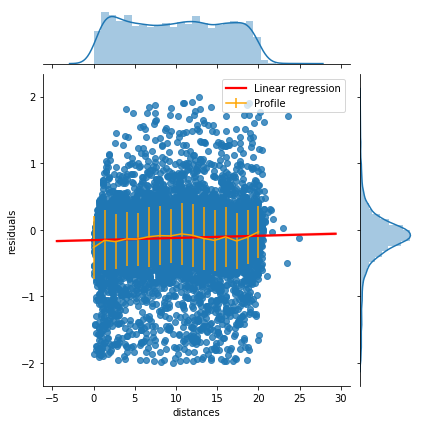

In [78]:
data = pd.DataFrame(dataset.item())

# Inspect the dataset
print('Check columns:', data.columns)

# Clean the sample
clean_data=data[abs(data['residuals'])<2]
print('\nClean dataframe:\n',clean_data)

# perform a linear regression of "residuals" versus "distances"
linreg = sp.stats.linregress(clean_data['distances'], clean_data['residuals'])

# plot a seaborn jointplot of "residuals" versus "distances"
plt.figure(figsize=(10,6))
sns.jointplot(y="residuals", x="distances", kind="reg", data=clean_data, line_kws={'color':'red', 'label':'Linear regression'});

# Fill 3 numpy arrays
num = 16
x = np.linspace(0, 20, num)
y = np.zeros(num)
erry = np.zeros(num)
bin_step = x[1]/2

for i in range(num-1):
    temp = clean_data[clean_data["distances"]>=x[i]-bin_step]
    temp = temp[temp["distances"]<x[i+1]-bin_step]
    y[i] = temp['residuals'].mean()
    erry[i] = temp['residuals'].std()

temp = clean_data[clean_data["distances"]>=x[-1]-bin_step]
temp = temp[temp["distances"]<x[-1]+bin_step]
y[-1] = temp['residuals'].mean()
erry[-1] = temp['residuals'].std()

# Plot the profile plot on top of the scatter plot
plt.errorbar(x, y, yerr=erry, label='Profile', color='orange')
plt.legend()
plt.show()